In [2]:
import os as os 

In [3]:
#os.chdir("/Users/himanshijain/Desktop/Python Directory")

In [4]:
#os.getcwd()

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [2]:
data=pd.DataFrame(pd.read_excel("C:\\Users\\SYSTEM H822\\Downloads\\Win_Prediction_Data.xlsx"))

In [3]:
data_copy=data

In [4]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


# Treating Missing Values 

In [5]:
data.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [6]:
data['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [7]:
data["Client Category"].fillna('Others', inplace=True)

In [8]:
data.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

In [9]:
(data["Deal Cost"] == 0).value_counts()

False    9815
True      246
Name: Deal Cost, dtype: int64

In [10]:
zero= data[data['Deal Cost'] == 0]
zero.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost


<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

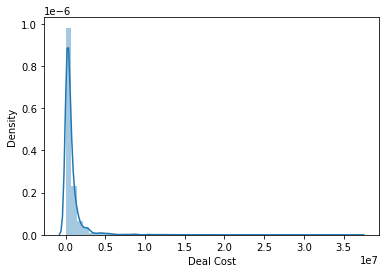

In [11]:
sns.distplot(data["Deal Cost"])

In [12]:
median=data[data["Deal Cost"]!=0].groupby("Deal Status Code").median().iloc[0]["Deal Cost"]
median

441176.47

In [13]:
def Deal_Cost_Median(Deal_Cost):
    if Deal_Cost == 0:
        return median
    else:
        return Deal_Cost

In [14]:
data['Deal Cost']= data['Deal Cost'].apply(Deal_Cost_Median)

In [15]:
data.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [16]:
(data["Deal Cost"] == 0).value_counts()

False    10061
Name: Deal Cost, dtype: int64

# DroppingDeal Date into Day, Month, Year

In [17]:
#data['Deal Year'] = pd.DatetimeIndex(data['Deal Date']).year
#data['Deal Month'] = pd.DatetimeIndex(data['Deal Date']).month
#data['Deal Day'] = pd.DatetimeIndex(data["Deal Date"]).day

In [18]:
data=data.drop(["Deal Date"], axis = 1)

In [19]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


# Checking correlation

In [20]:
df1 = data.apply( lambda x : pd.factorize(x)[0]).corr(method = "pearson", min_periods = 1); df1

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
Client Category,1.000000,-0.000288,0.415474,-0.058440,0.065936,0.065094,-0.067462,0.066413
Solution Type,-0.000288,1.000000,-0.005967,-0.062212,0.104661,0.091017,0.076684,0.094455
Sector,0.415474,-0.005967,1.000000,0.026685,0.068515,0.045726,-0.072981,0.030751
Location,-0.058440,-0.062212,0.026685,1.000000,0.058452,0.011930,0.025903,0.048104
VP Name,0.065936,0.104661,0.068515,0.058452,1.000000,0.386554,0.070383,0.033829
Manager Name,0.065094,0.091017,0.045726,0.011930,0.386554,1.000000,0.098902,-0.017289
Deal Cost,-0.067462,0.076684,-0.072981,0.025903,0.070383,0.098902,1.000000,-0.202247
Deal Status Code,0.066413,0.094455,0.030751,0.048104,0.033829,-0.017289,-0.202247,1.000000


<AxesSubplot:>

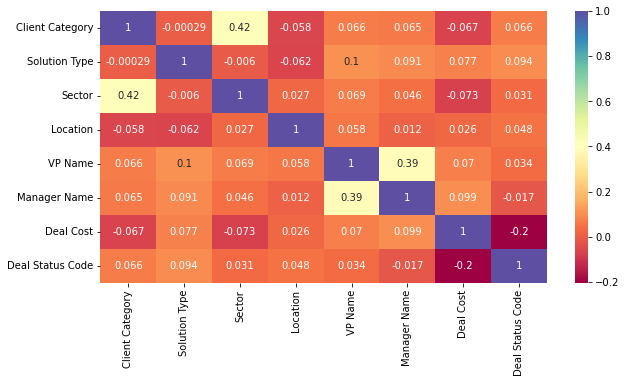

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df1,cmap="Spectral",annot = True)

In [24]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [27]:
#!pip install category_encoders

In [28]:
data["Deal Status Code"]=data["Deal Status Code"].map({"Won":1,"Lost":0})

In [29]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


# Target Encoding

In [30]:
#!pip install category_encoders

In [31]:
from category_encoders import TargetEncoder
cols= ["Solution Type","Client Category","Sector","Location","VP Name","Manager Name"] 
target= 'Deal Status Code'
for col in cols:
    te= TargetEncoder()
    te.fit(X=data[cols], y=data[target])
    values = te.transform(data[cols])


In [32]:
values.head()

,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
0,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
2,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364


In [33]:
data.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,0


In [34]:
data=data.drop(["Solution Type","Location","Client Category","Sector","VP Name", "Manager Name"], axis = 1) # add VP_Manager_Name, add Client_Sector_Category

In [35]:
df=pd.concat([data,values],axis =1)

In [36]:
df.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
0,150000.00,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
1,744705.88,1,0.348315,0.412844,0.377163,0.402062,0.625455,0.418605
2,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364


# Checking target variable 

In [37]:
df["Deal Status Code"].value_counts()

0    6306
1    3755
Name: Deal Status Code, dtype: int64

In [38]:
deal_status_code_Won=df[df["Deal Status Code"]== 1]
deal_status_code_Lost=df[df["Deal Status Code"]== 0]

In [39]:
deal_status_code_Won.shape


(3755, 8)

In [40]:
deal_status_code_Lost.shape

(6306, 8)

In [41]:
count_deal_status_code_0, count_deal_status_code_1= df["Deal Status Code"].value_counts()

In [42]:
count_deal_status_code_0

6306

In [43]:
count_deal_status_code_1

3755

# Under Sampling

In [44]:
deal_status_code_Lost_under_sampled=deal_status_code_Lost.sample(count_deal_status_code_1)

In [45]:
deal_status_code_Lost_under_sampled.shape

(3755, 8)

# Over Sampling

In [46]:
deal_status_code_Won_over_sampled=deal_status_code_Won.sample((count_deal_status_code_0), replace = True)

In [47]:
deal_status_code_Won_over_sampled.shape

(6306, 8)

In [48]:
balance_dataset=pd.concat((deal_status_code_Lost, deal_status_code_Won_over_sampled), axis=0)

In [49]:
balance_dataset.head()

,Deal Cost,Deal Status Code,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
2,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
3,60000.00,0,0.322176,0.522696,0.503234,0.478580,0.625455,0.636364
4,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
5,80882.35,0,0.564976,0.522696,0.503234,0.478580,0.625455,0.636364
7,409705.88,0,0.348315,0.289256,0.200000,0.402062,0.361925,0.289720


In [50]:
balance_dataset["Deal Status Code"].value_counts()

0    6306
1    6306
Name: Deal Status Code, dtype: int64

Text(0, 0.5, ' Deal Status Code')

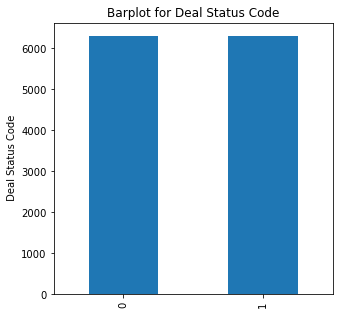

In [51]:
plt.figure(figsize=(5,5))
balance_dataset["Deal Status Code"].value_counts().plot(kind="bar")
plt.title("Barplot for Deal Status Code")
plt.ylabel(" Deal Status Code")

# Model Creation 

In [52]:
from sklearn.model_selection import train_test_split
x=balance_dataset.drop(['Deal Status Code'], axis =1)
y=balance_dataset['Deal Status Code']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123, test_size=0.3)

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8828 entries, 4753 to 5620
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Deal Cost        8828 non-null   float64
 1   Solution Type    8828 non-null   float64
 2   Client Category  8828 non-null   float64
 3   Sector           8828 non-null   float64
 4   Location         8828 non-null   float64
 5   VP Name          8828 non-null   float64
 6   Manager Name     8828 non-null   float64
dtypes: float64(7)
memory usage: 551.8 KB


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train).fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.638276
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.079      
Dependent Variable: Deal Status Code AIC:              11283.3974 
Date:               2022-09-27 23:36 BIC:              11332.9972 
No. Observations:   8828             Log-Likelihood:   -5634.7    
Df Model:           6                LL-Null:          -6118.8    
Df Residuals:       8821             LLR p-value:      6.4597e-206
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Deal Cost         -0.0000   0.0000  -1.7415 0.0816 -0.0000  0.0000
Solution Type      1.2408   0.2072   5.9871 0.0000  0

In [57]:
y_pred_LR=log_reg.predict(x_test)
y_pred_LR

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1926
           1       0.49      1.00      0.66      1858

    accuracy                           0.49      3784
   macro avg       0.25      0.50      0.33      3784
weighted avg       0.24      0.49      0.32      3784



In [59]:
print(confusion_matrix(y_test,y_pred_LR))

[[   0 1926]
 [   0 1858]]


# SVM 

In [60]:
from sklearn.svm import SVC
svm_model=SVC(kernel="rbf",C=1.0, random_state=42)
svm_model.fit(x_train,y_train)

SVC(random_state=42)

In [61]:
y_pred_svm=svm_model.predict(x_test)
y_pred_svm

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
print(classification_report(y_test,y_pred_svm))  

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1926
           1       0.55      0.53      0.54      1858

    accuracy                           0.56      3784
   macro avg       0.56      0.56      0.56      3784
weighted avg       0.56      0.56      0.56      3784



In [63]:
print(confusion_matrix(y_test,y_pred_svm))

[[1116  810]
 [ 865  993]]


# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [65]:
model_dt=dt.fit(x_train,y_train)

In [66]:
y_pred_DT=model_dt.predict(x_test)
y_pred_DT

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1926
           1       0.88      0.87      0.88      1858

    accuracy                           0.88      3784
   macro avg       0.88      0.88      0.88      3784
weighted avg       0.88      0.88      0.88      3784



In [68]:
matrix=confusion_matrix(y_test,y_pred_DT)
print(matrix)

[[1716  210]
 [ 247 1611]]


In [69]:
from sklearn.metrics import accuracy_score

train_pred_DT=model_dt.predict(x_train)
print("Train accuracy:", accuracy_score(y_train, train_pred_DT))
print("Test accuracy:",(accuracy_score(y_test, y_pred_DT)))

Train accuracy: 0.9963751699139103
Test accuracy: 0.8792283298097252


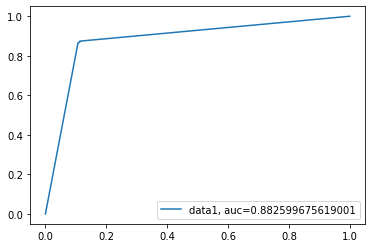

In [70]:
from sklearn import metrics
y_pred_proba=model_dt.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN 

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=11, weights="uniform",algorithm="auto")
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [72]:
y_pred_knn= neigh.predict(x_test)
y_pred_knn

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1926
           1       0.69      0.72      0.70      1858

    accuracy                           0.70      3784
   macro avg       0.70      0.70      0.70      3784
weighted avg       0.70      0.70      0.70      3784



In [74]:
print(confusion_matrix(y_test,y_pred_knn))

[[1327  599]
 [ 528 1330]]


# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfcmodel=rfc.fit(x_train,y_train)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
y_pred_RF=rfcmodel.predict(x_test)
y_pred_RF

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1926
           1       0.91      0.87      0.89      1858

    accuracy                           0.90      3784
   macro avg       0.90      0.90      0.90      3784
weighted avg       0.90      0.90      0.90      3784



In [79]:
matrix=confusion_matrix(y_test,y_pred_RF)
print(matrix)

[[1770  156]
 [ 235 1623]]


In [80]:
from sklearn.metrics import accuracy_score

train_pred_RF=rfcmodel.predict(x_train)
print("Train accuracy:", accuracy_score(y_train, train_pred_RF))
print("Test accuracy:",(accuracy_score(y_test, y_pred_RF)))

Train accuracy: 0.9963751699139103
Test accuracy: 0.8966701902748414


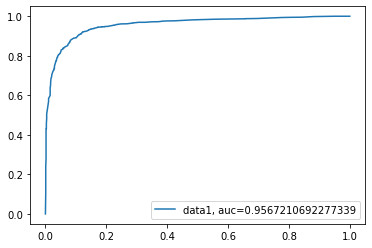

In [81]:
y_pred_proba=rfcmodel.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Checking for overfitting, Train score - 87%, Test Score - 80%

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)
rf_validation_score_train=cross_val_score(rfcmodel,x_train,y_train,cv= kfold, scoring = "accuracy")

In [83]:
rf_validation_score_train

array([0.89694224, 0.88788222, 0.8810872 , 0.88335221, 0.88674972,
       0.89467724, 0.8810872 , 0.90033975, 0.90249433, 0.88662132])

In [84]:
rf_validation_score_train.mean(), rf_validation_score_train.std()

(0.8901233426552956, 0.007499811886337256)

In [85]:
rf_validation_score_test=cross_val_score(rfcmodel,x_test,y_test,cv=10)

In [86]:
rf_validation_score_test

array([0.78100264, 0.82058047, 0.7994723 , 0.78891821, 0.77513228,
       0.76719577, 0.74074074, 0.81481481, 0.80952381, 0.78042328])

In [87]:
rf_validation_score_test.mean()

0.7877804302606414

# Hyper Parameter Tuning for Random Forest

In [88]:
parameters={
    'n_estimators': [100,150,200,250,300,400],
    'max_depth':[2,4,6,10,20],
    'min_samples_split':[2,5,10,20,35,50],
    'min_samples_leaf':[1,2,10,50,100,150,200], #important #default numbers   
}

# RansomSearchCV

In [93]:
from sklearn.model_selection import RandomizedSearchCV
rf_randomGrid=RandomizedSearchCV(estimator = random_forest,param_distributions=parameters,cv=10,verbose =2, n_jobs =4)

In [94]:
rf_randomGrid.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'max_depth': [2, 4, 6, 10, 20],
                                        'min_samples_leaf': [1, 2, 10, 50, 100,
                                                             150, 200],
                                        'min_samples_split': [2, 5, 10, 20, 35,
                                                              50],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 400]},
                   verbose=2)

In [95]:
rf_randomGrid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [96]:
#checking accuracy 
print(f'Train Accuracy - : {rf_randomGrid.score(x_train,y_train):.3f}')
print(f'Test Accuracy - : {rf_randomGrid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.855
Test Accuracy - : 0.794


# Training and Test Accuracy is almost same for RandomSearchCV and GridSearch

# Random Forest Model with best Parameters

In [97]:
better_model=RandomForestClassifier(max_depth=20,min_samples_leaf = 10,
                                    min_samples_split = 10,n_estimators =300)




In [98]:
better_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=300)

In [114]:
y_pred_better_model=better_model.predict(x_test)

In [115]:
print(classification_report(y_test,y_pred_better_model))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1926
           1       0.91      0.88      0.90      1858

    accuracy                           0.90      3784
   macro avg       0.90      0.90      0.90      3784
weighted avg       0.90      0.90      0.90      3784



In [116]:
confusion_matrix(y_test,y_pred_better_model)

array([[1768,  158],
       [ 224, 1634]], dtype=int64)

In [117]:
better_model=cross_val_score(better_model,x_train,y_train,cv=10)

In [118]:
better_model

array([0.89241223, 0.89354473, 0.89014723, 0.89127973, 0.89014723,
       0.89580974, 0.89014723, 0.90147225, 0.88662132, 0.89569161])

In [119]:
better_model.mean()

0.8927273287570975

# Xgboost

In [121]:
! pip install xgboost

In [122]:
#from xgboost import XGBClassifier

In [124]:
from sklearn.model_selection import cross_val_score
xgboost_model=XGBClassifier()
xgboost_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [127]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred_xg = model.predict(x_test)

In [128]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1926
           1       0.84      0.85      0.84      1858

    accuracy                           0.85      3784
   macro avg       0.85      0.85      0.85      3784
weighted avg       0.85      0.85      0.85      3784



In [129]:
print(confusion_matrix(y_test,y_pred_xg))

[[1631  295]
 [ 285 1573]]


# Hyperparameter Tuning for XGboost

In [130]:
params={
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.50,0.70,0.90],
    "max_depth" : [3,4,5,6,8,10,12,15,20,25,30,35],
    "min_child_weight" : [1,3,5,7,11],
    "gamma" : [0.0,0.1,0.2,0.3,0.4,0.6],
    "colsample_bytree" : [0.3,0.4,0.5,0.7,0.9],
    "n_estimator" : [150,250,300,500]
}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
import xgboost
classifier=xgboost.XGBClassifier()

In [133]:
random_search=RandomizedSearchCV(classifier, param_distributions=params,n_iter=5,
                                 scoring="roc_auc",n_jobs = -1, cv=5,verbose = 1)

In [134]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[16:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, r

In [135]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimator=500,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [136]:
random_search.best_params_

{'n_estimator': 500,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [137]:
import xgboost
classifier_best_params=xgboost.XGBClassifier(n_estimator=500,min_child_weight = 3,
                                             max_depth= 15,learning_rate=0.05,gamma = 0.1,
                                             colsample_bytree = 0.7)


In [138]:
classifier_best_params.fit(x_train,y_train)

[16:47:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=300,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [139]:
y_pred_classifier=classifier_best_params.predict(x_test)

In [140]:
print(classification_report(y_test,y_pred_classifier))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1926
           1       0.90      0.90      0.90      1858

    accuracy                           0.90      3784
   macro avg       0.90      0.90      0.90      3784
weighted avg       0.90      0.90      0.90      3784



In [141]:
confusion_matrix(y_test,y_pred_classifier)

array([[1747,  179],
       [ 188, 1670]], dtype=int64)

In [142]:
validation_score=cross_val_score(classifier_best_params,x_train,y_train,cv=10)

[16:48:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This c

In [143]:
validation_score

array([0.88561721, 0.89241223, 0.88901472, 0.90713477, 0.8788222 ,
       0.89580974, 0.88901472, 0.91166478, 0.88208617, 0.8968254 ])

In [144]:
validation_score.mean()

0.8928401938351784

In [145]:
type2=x_test[(y_pred_classifier == 1) & (y_test == 0)]  #one way
type2.shape

(179, 7)

In [146]:
type1=x_test[(y_pred_classifier == 0) & (y_test == 1)] #one way
type1.shape

(188, 7)

In [147]:
join=x_test[y_test != y_pred_classifier] #2nd way
join.head()

,Deal Cost,Solution Type,Client Category,Sector,Location,VP Name,Manager Name
8311,1441176.47,0.302752,0.353963,0.571428,0.402062,0.421053,0.333333
7741,2117647.06,0.564976,0.482955,0.391014,0.419847,0.476190,0.511111
5796,1852941.18,0.564976,0.353963,0.377163,0.402062,0.625455,0.550000
1010,591176.47,0.564976,0.353963,0.391014,0.359712,0.372727,0.562500
7007,1397058.82,0.245283,0.522696,0.452575,0.402062,0.361925,0.448276


In [148]:
data_copy.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [149]:
dataframe=pd.DataFrame(data_copy)

In [150]:
dataframe.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
